In [4]:
!pip install plotly

In [5]:
!pip install cufflinks

In [211]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 6.7 MB/s eta 0:00:00


In [266]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from  plotly.offline import iplot
import plotly as py 
import plotly.tools as tls 
import cufflinks as cf 

In [267]:
pwd

'C:\\Users\\Anthony\\Downloads\\EDA'

In [268]:
# import dataset as csv file
pizza = pd.read_csv('pizza_sales.csv', encoding= 'unicode_escape')

In [269]:
pizza.shape

(48620, 12)

In [270]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [271]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [272]:
def convert(value):
    return value*81.91

In [273]:
pizza['total_price']=pizza['total_price'].apply(convert)

In [274]:
pd.isnull(pizza).sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [275]:
pizza.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [276]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,1085.3075,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,1310.5600,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,1515.3350,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,1699.6325,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,1310.5600,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [277]:
def convert(value):
    return value*81.91

In [278]:
pizza['unit_price']=pizza['unit_price'].apply(convert)

In [279]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,1085.3075,1085.3075,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,1310.5600,1310.5600,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,1515.3350,1515.3350,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,1699.6325,1699.6325,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,1310.5600,1310.5600,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [280]:
pizza.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,1351.034356,1377.846909
std,14035.529381,6180.119770,0.143077,296.660750,363.467236
min,1.000000,1.000000,1.000000,798.622500,798.622500
25%,12155.750000,5337.000000,1.000000,1044.352500,1044.352500
50%,24310.500000,10682.500000,1.000000,1351.515000,1351.515000
75%,36465.250000,16100.000000,1.000000,1658.677500,1679.155000
max,48620.000000,21350.000000,4.000000,2944.664500,6798.530000


<AxesSubplot:xlabel='unit_price', ylabel='pizza_name_id'>

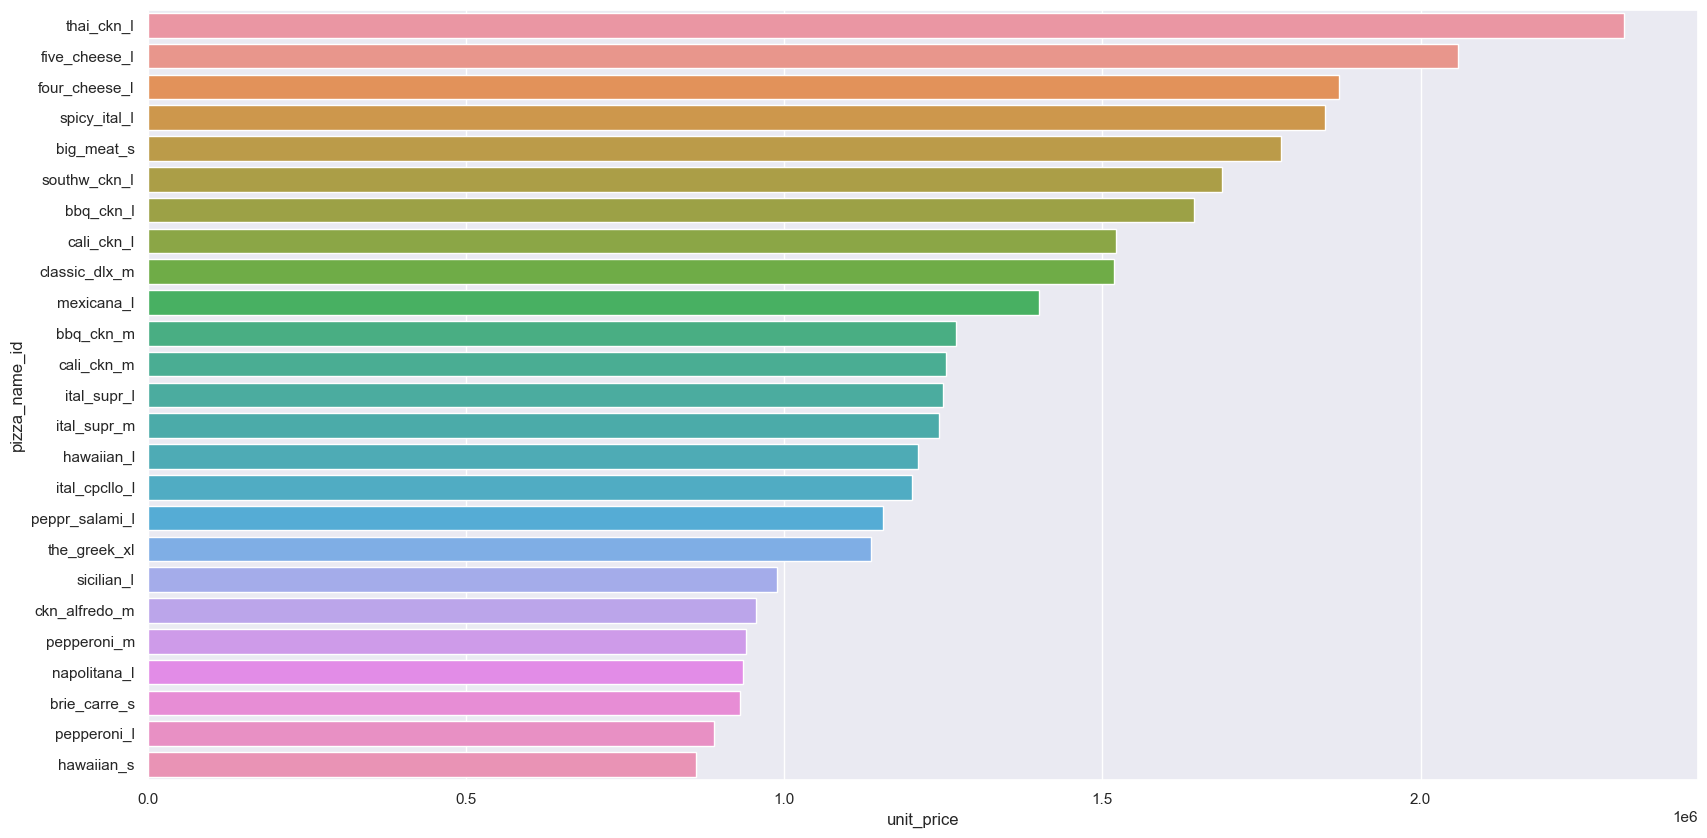

In [281]:
sales_pizza_name_id = pizza.groupby(['pizza_name_id'], as_index=False)['unit_price'].sum().sort_values(by='unit_price', ascending=False).head(25)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = sales_pizza_name_id, y = 'pizza_name_id',x= 'unit_price')

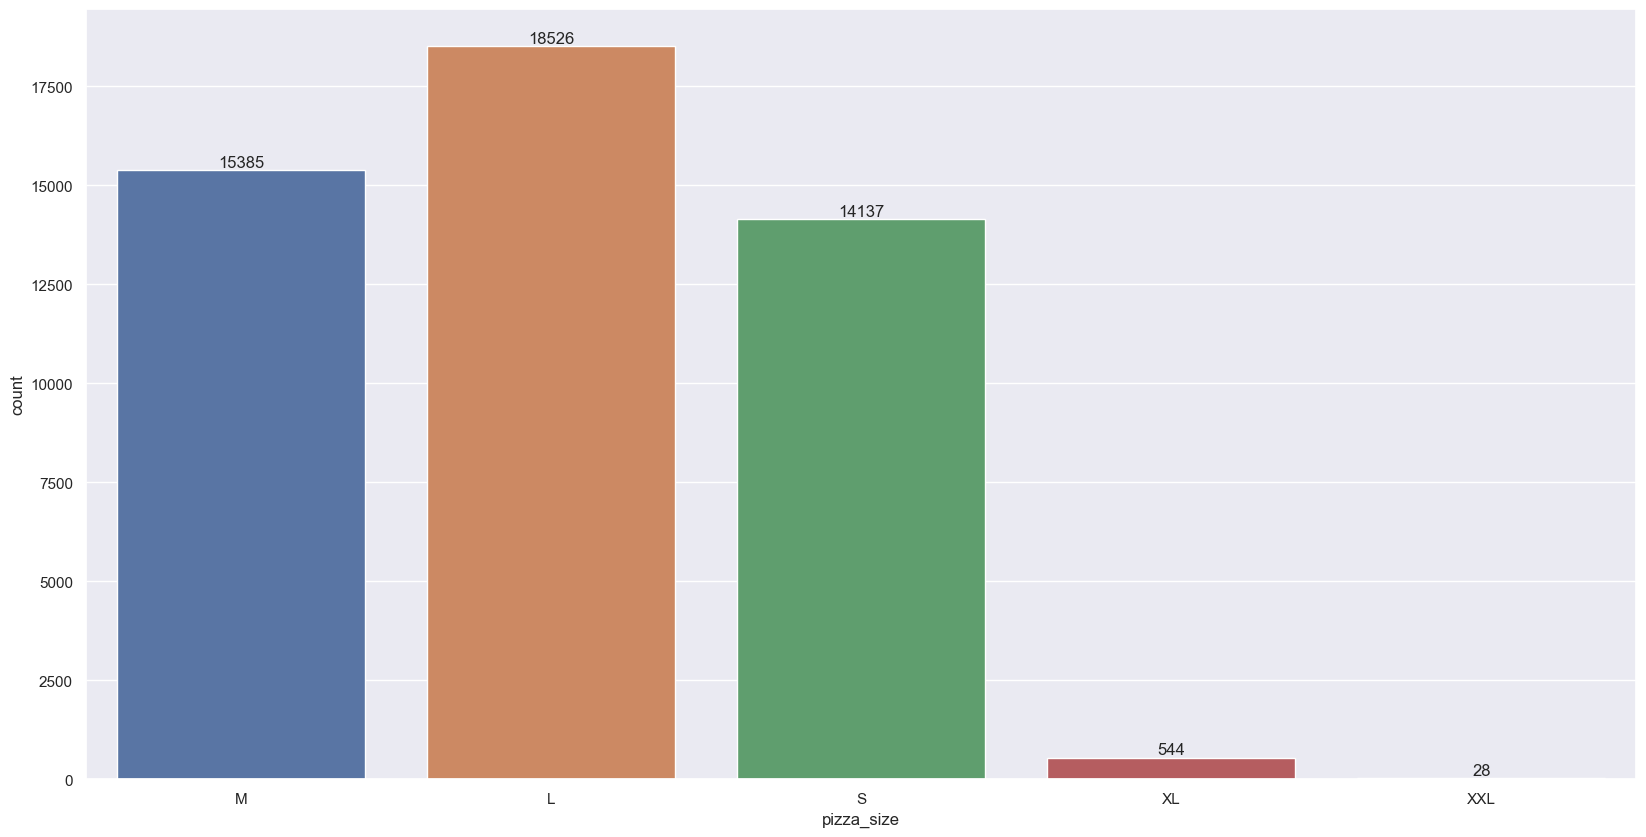

In [282]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'pizza_size',data = pizza)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='pizza_size', ylabel='total_price'>

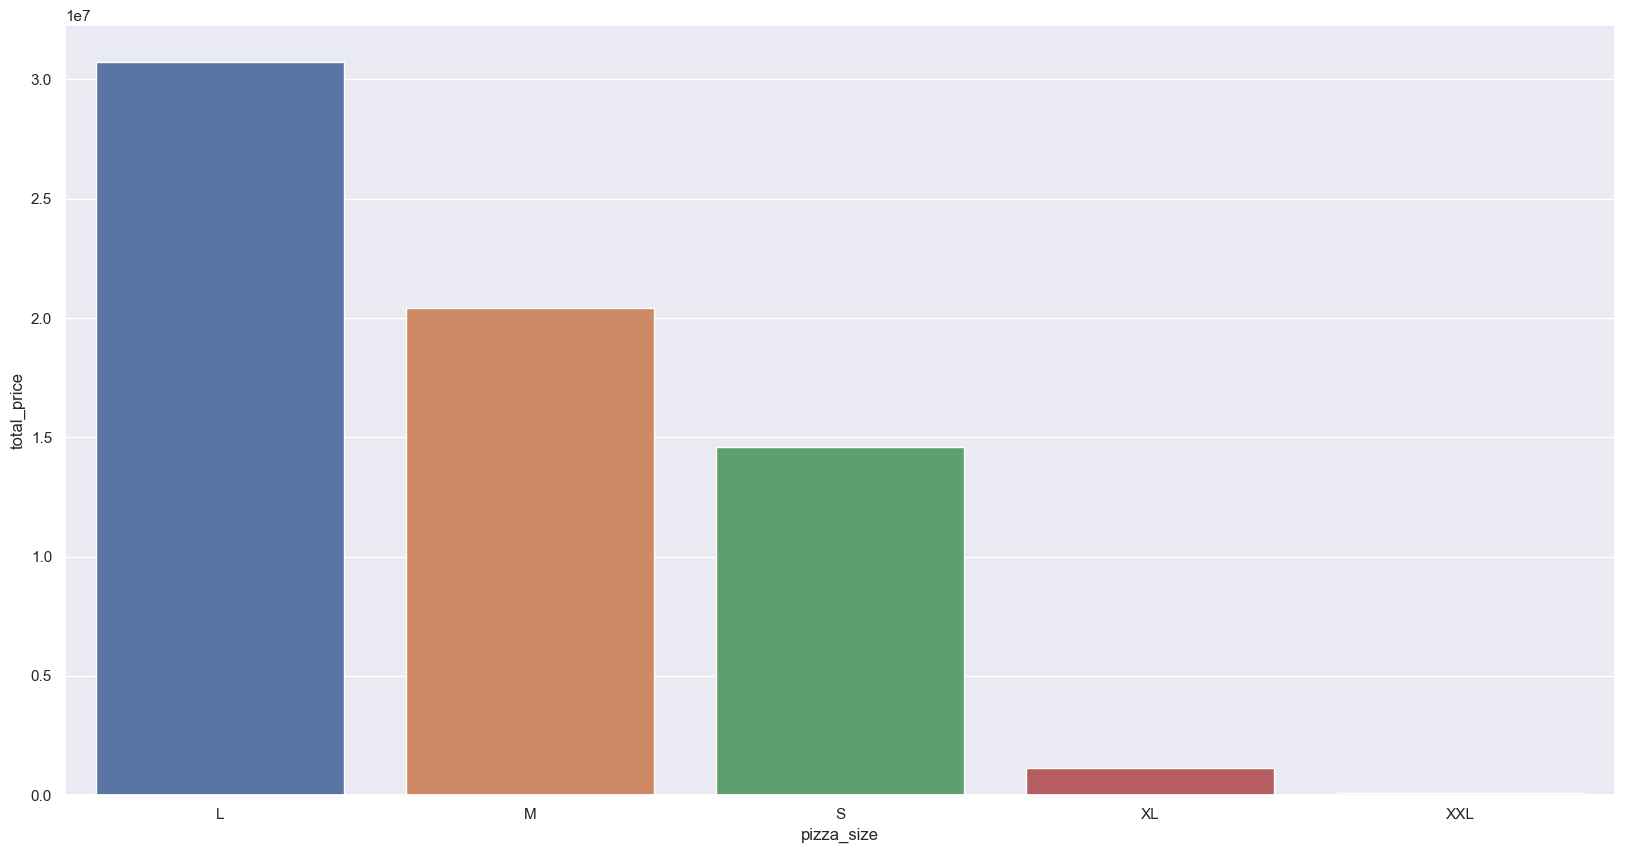

In [283]:
# plotting a bar chart for pizza_size vs total_price

price = pizza.groupby(['pizza_size'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)

sns.barplot(x = 'pizza_size',y= 'total_price' ,data = price)

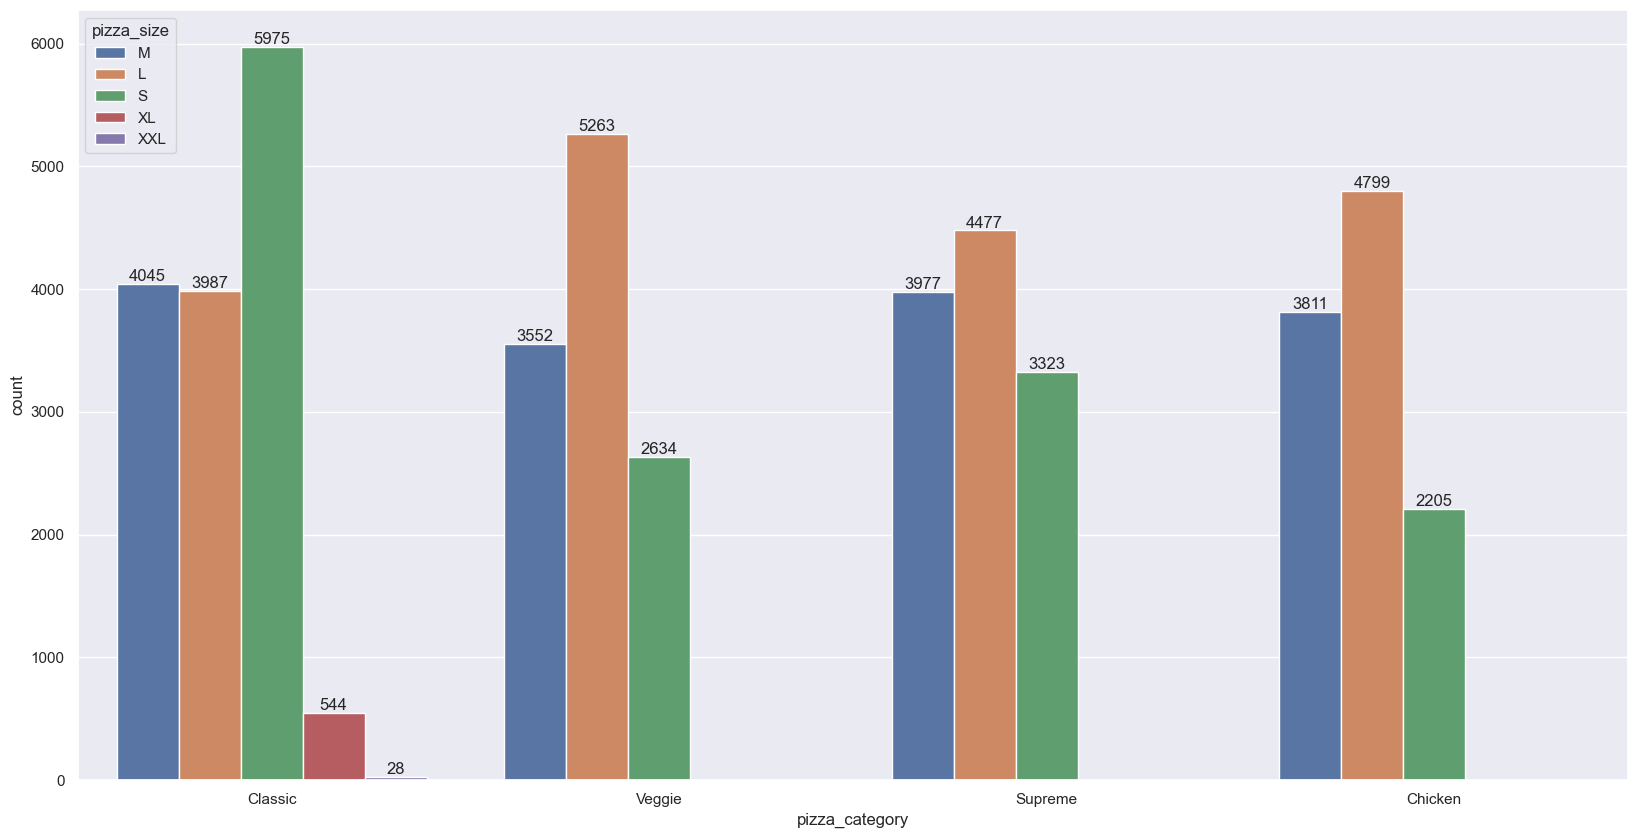

In [284]:
ax = sns.countplot(data = pizza, x = 'pizza_category', hue = 'pizza_size')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='total_price', ylabel='pizza_name_id'>

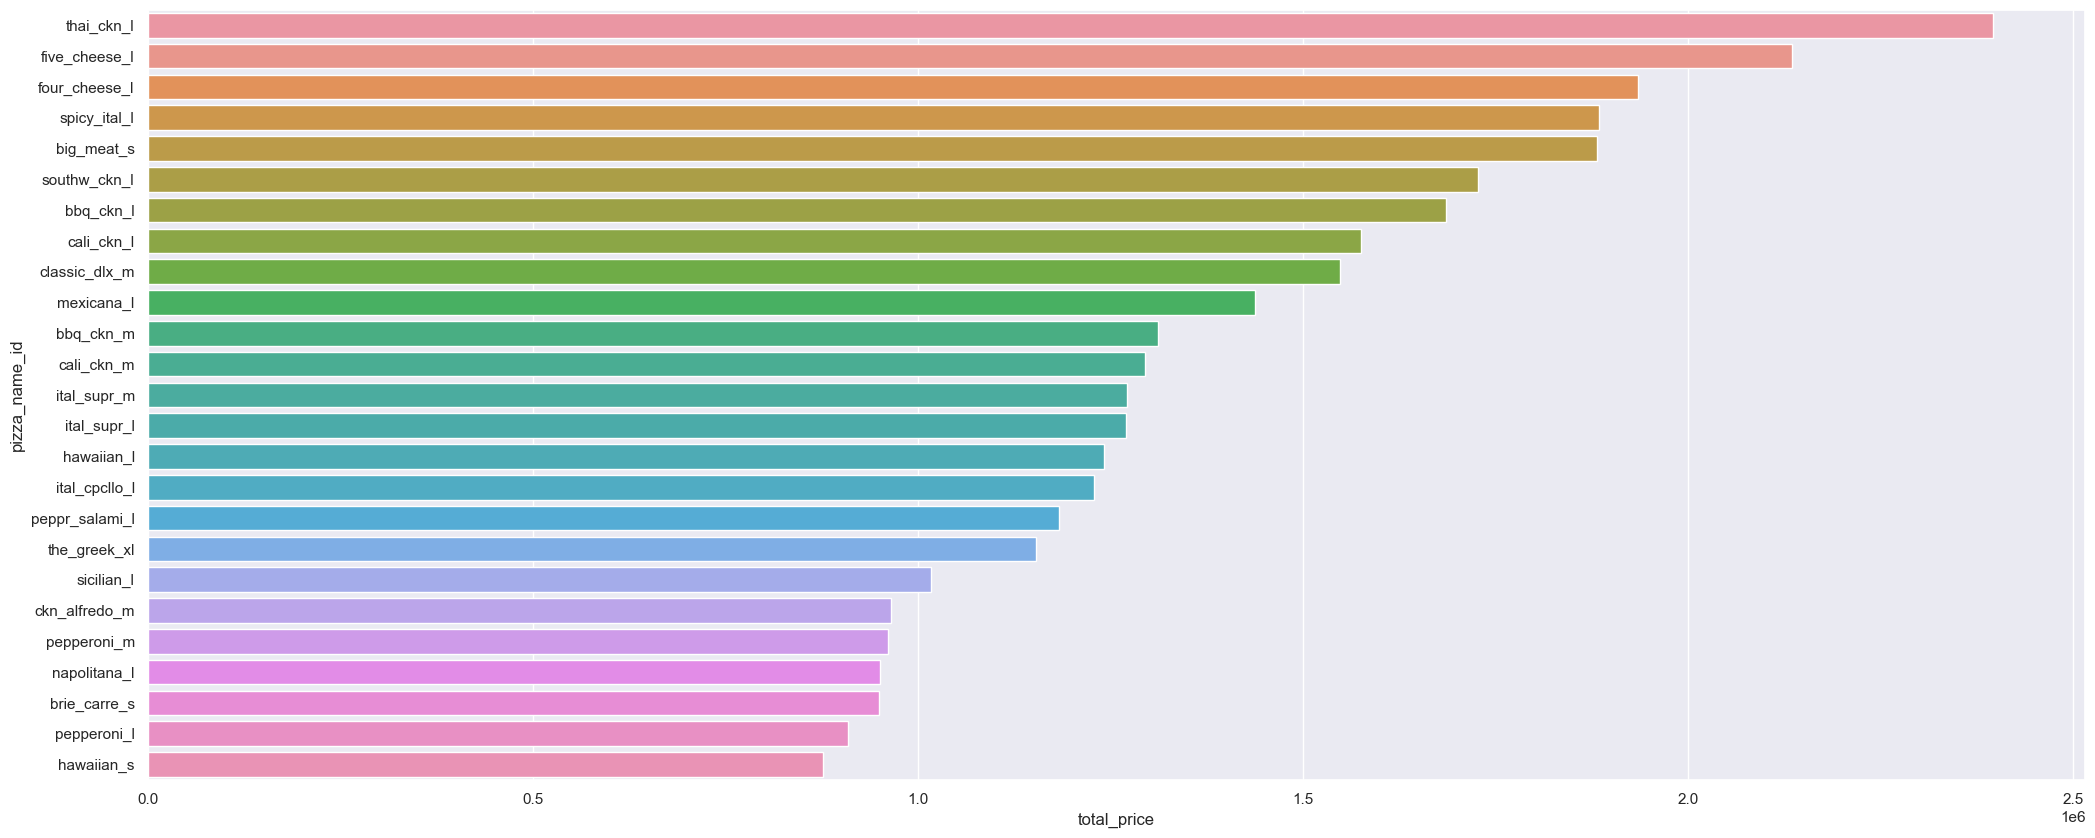

In [285]:
# total amount/sales from top 10 states

sales_pizza_name = pizza.groupby(['pizza_name_id'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False).head(25)

sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data = sales_pizza_name, y = 'pizza_name_id',x= 'total_price')

<AxesSubplot:xlabel='pizza_name_id', ylabel='total_price'>

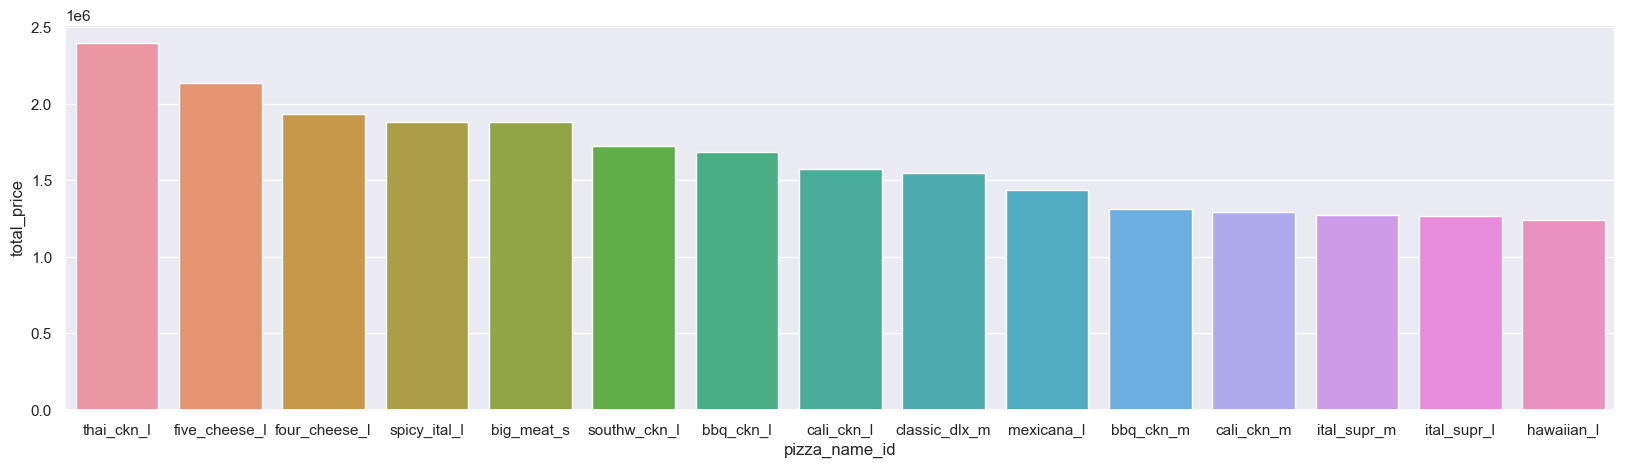

In [286]:
# total price from top 15 pizzas

sales_pizza_name_id = pizza.groupby(['pizza_name_id'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False).head(15)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_pizza_name_id, x = 'pizza_name_id',y= 'total_price')


<Figure size 10000x15000 with 0 Axes>

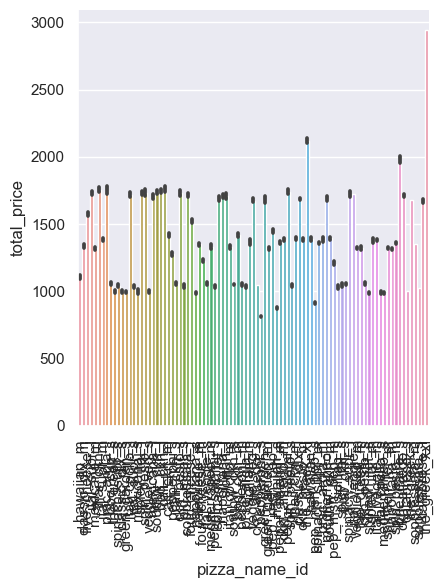

In [287]:
plt.figure(figsize=(100,150))
# Create a plot using Seaborn
sns.catplot(x='pizza_name_id', y='total_price', data=pizza, kind='bar')

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')
sns.set(rc={'figure.figsize':(200,100)})

Text(0.5, 1.0, 'Scatterplot of total price and pizza name')

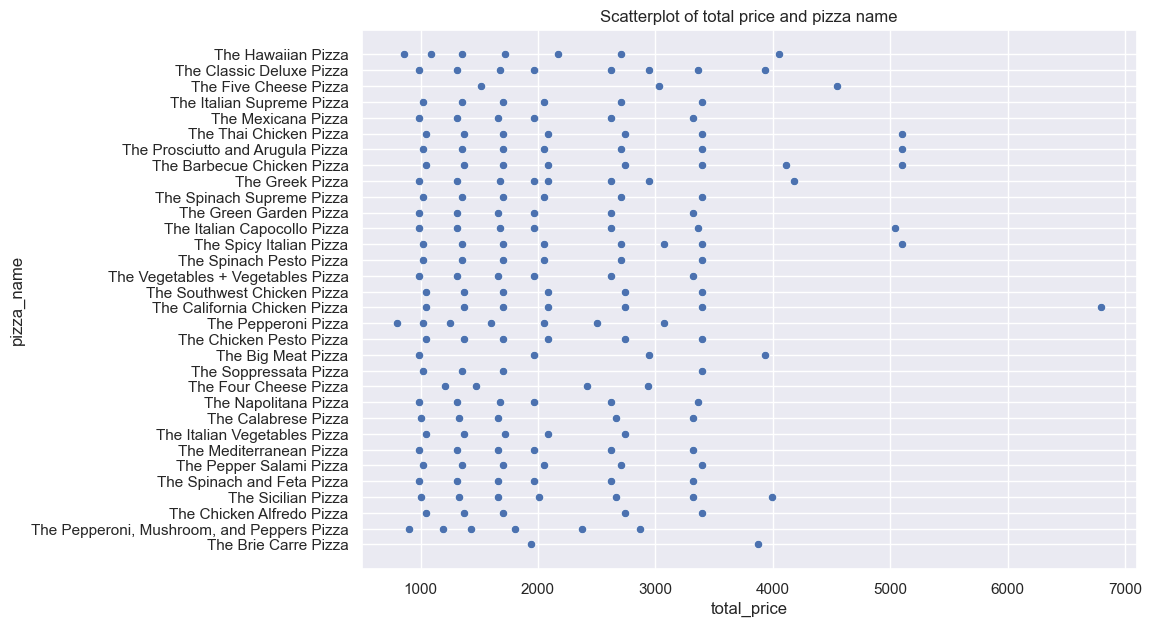

In [288]:
# figure size
plt.figure(figsize=(10,7))

# Simple scatterplot
ax = sns.scatterplot(x='total_price', y='pizza_name', data=pizza)

ax.set_title('Scatterplot of total price and pizza name')

<AxesSubplot:>

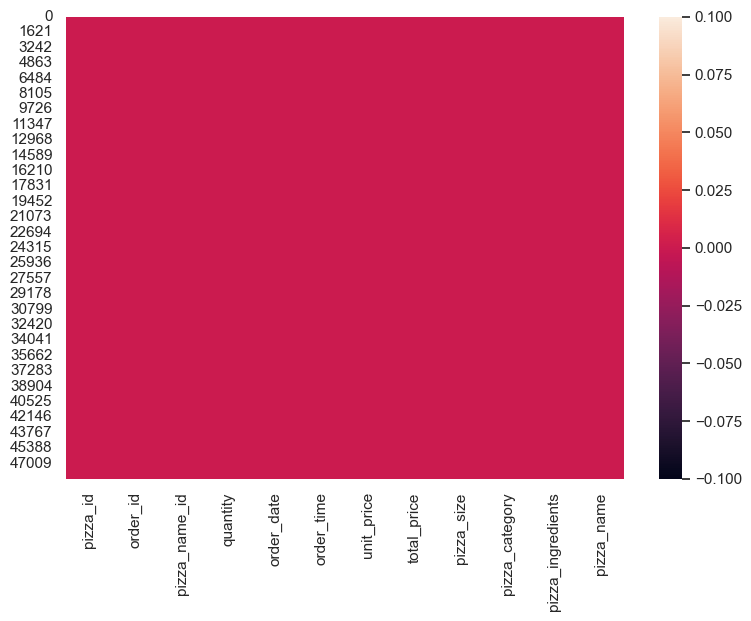

In [289]:
plt.figure(figsize=(9,6))
sns.heatmap(pizza.isnull(), cbar=True)

In [290]:
plt.hist(x = "unit_price", data=pizza)
plt.title("Price Distribution")
plt.show()

In [291]:
pizza['pizza_size'].value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

In [292]:
sns.countplot(pizza['pizza_size'])

C:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='pizza_size', ylabel='count'>

In [293]:
pizza['pizza_ingredients'].value_counts()

Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola Piccante Cheese, Mo

In [294]:
sns.countplot(y = pizza['pizza_ingredients'])
sns.set(rc={'figure.figsize':(20,5)})

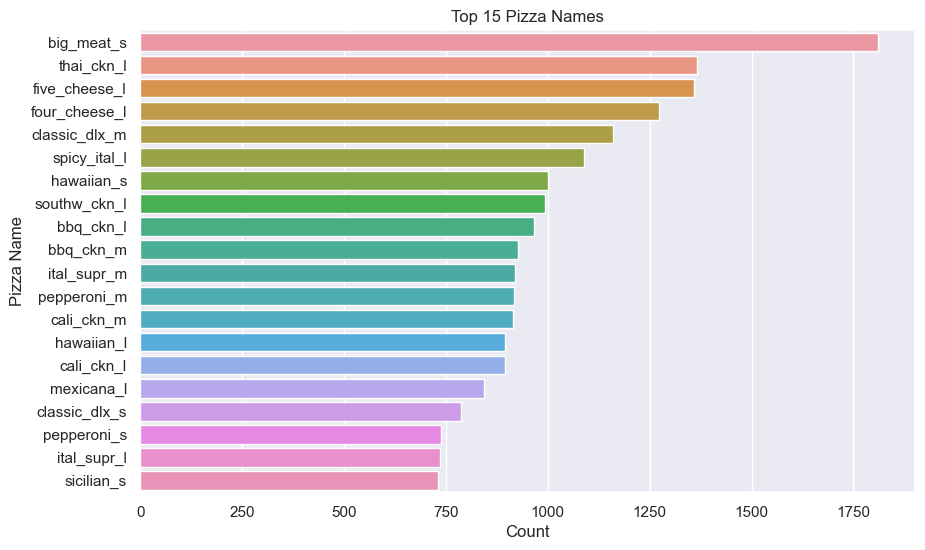

In [295]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

pizza_counts = pizza['pizza_name_id'].value_counts().head(20)
sns.countplot(y='pizza_name_id', data=pizza, order=pizza_counts.index)

plt.title('Top 15 Pizza Names')
plt.xlabel('Count')
plt.ylabel('Pizza Name')
plt.show()

<AxesSubplot:xlabel='pizza_size', ylabel='unit_price'>

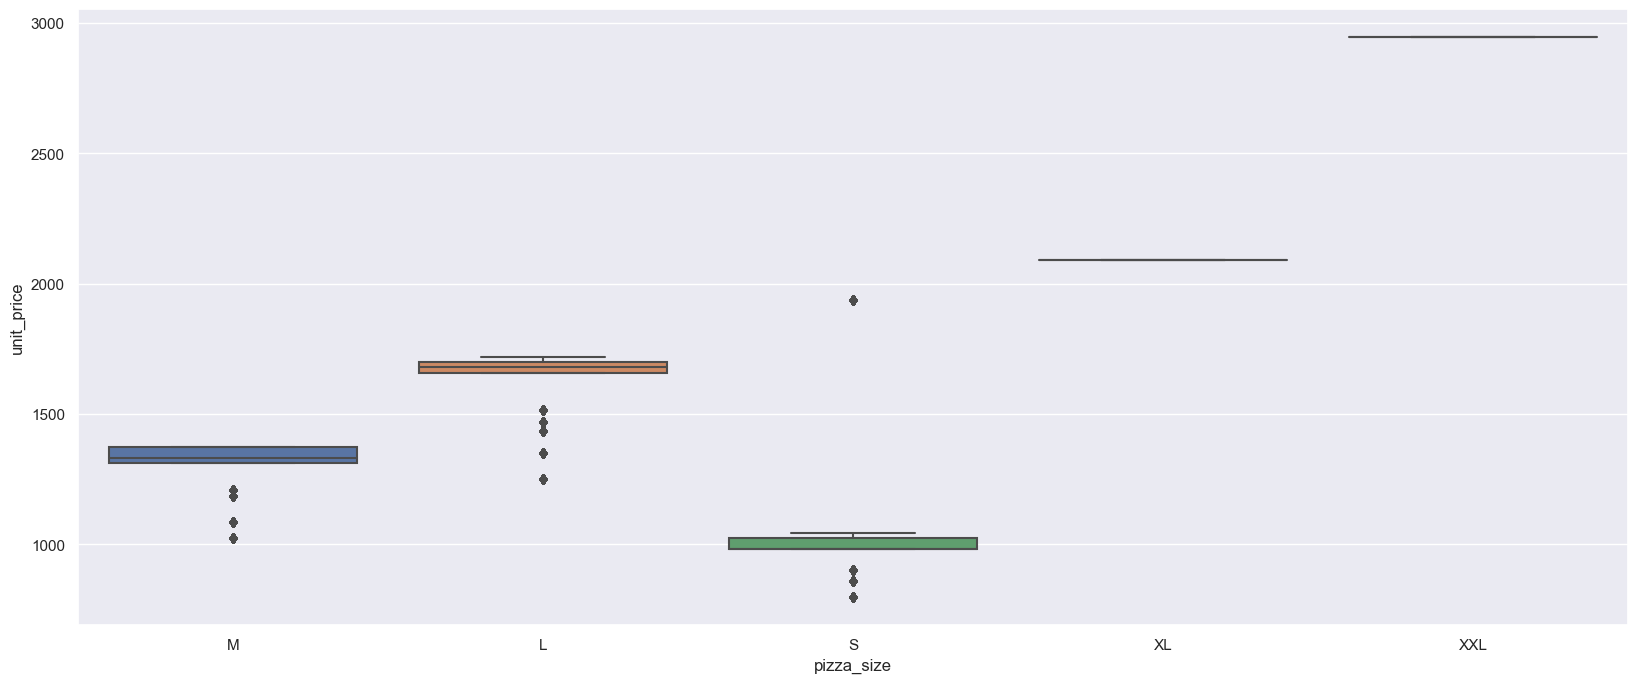

In [296]:
plt.figure(figsize=(20, 8))
sns.boxplot(y='unit_price',x='pizza_size',data=pizza)

<AxesSubplot:xlabel='pizza_category', ylabel='unit_price'>

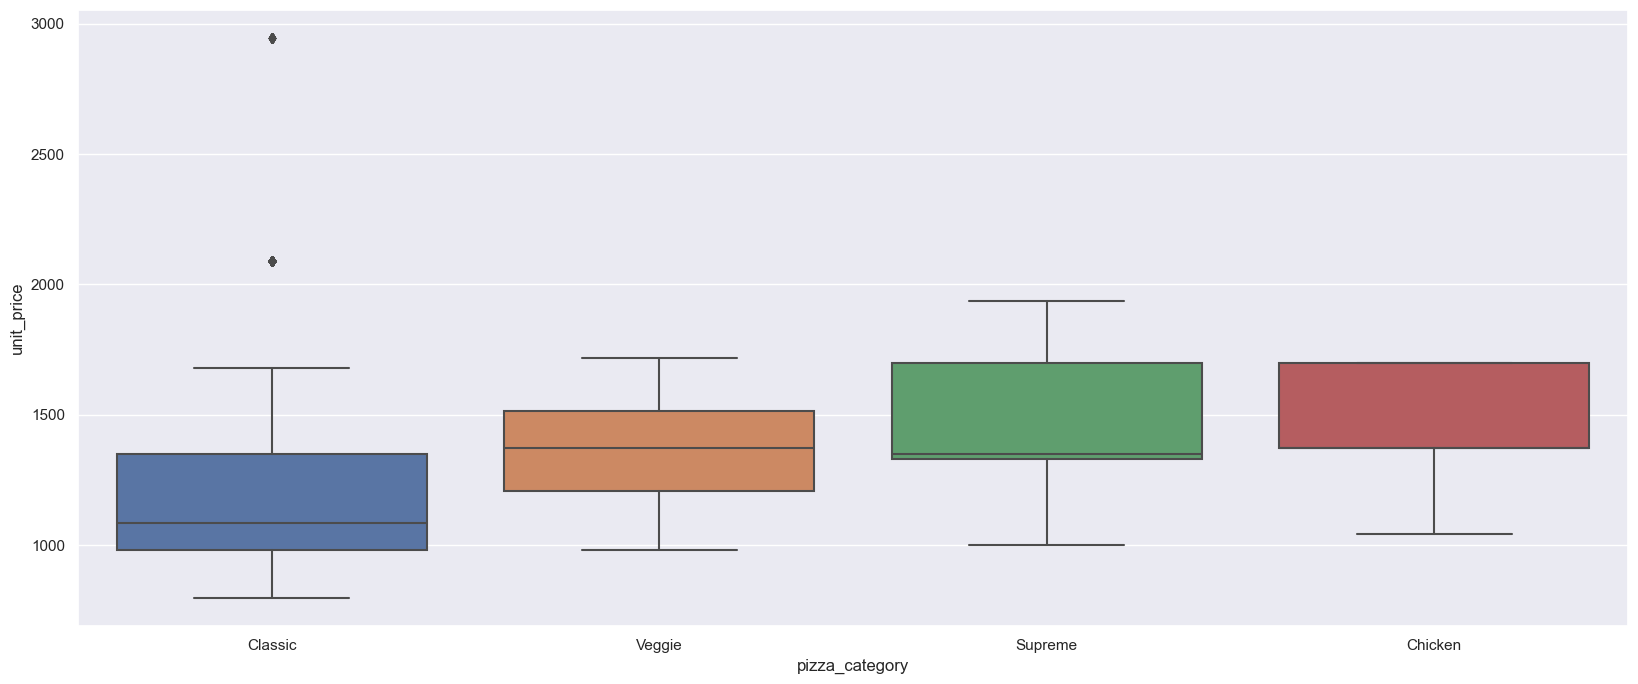

In [297]:
plt.figure(figsize=(20, 8))
sns.boxplot(y='unit_price',x='pizza_category',data=pizza)

In [298]:
pizza[(pizza['pizza_category']=='Classic') & (pizza['unit_price']>=2000)]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
121,122,50,the_greek_xl,1,01-01-2015,18:41:01,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
297,298,125,the_greek_xl,1,02-01-2015,20:31:06,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
357,358,147,the_greek_xl,1,03-01-2015,14:32:51,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
386,387,161,the_greek_xl,1,03-01-2015,16:43:46,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
469,470,200,the_greek_xl,1,03-01-2015,22:24:05,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48099,48100,21140,the_greek_xl,1,26-12-2015,21:49:13,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
48220,48221,21189,the_greek_xl,1,28-12-2015,12:38:57,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
48372,48373,21243,the_greek_xl,1,29-12-2015,21:15:19,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
48436,48437,21270,the_greek_xl,1,30-12-2015,18:59:45,2088.705,2088.705,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza


In [299]:
cat_cols=pizza.select_dtypes(include=['object']).columns
cat_cols

Index(['pizza_name_id', 'order_date', 'order_time', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [300]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,1085.3075,1085.3075,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,1310.5600,1310.5600,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,1515.3350,1515.3350,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,1699.6325,1699.6325,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,1310.5600,1310.5600,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [301]:
from sklearn.preprocessing import LabelEncoder

In [302]:
en=LabelEncoder()
for i in cat_cols:
    pizza[i]=en.fit_transform(pizza[i])

In [303]:
pizza.head(20)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,27,1,0,415,1085.3075,1085.3075,1,1,23,12
1,2,2,18,1,0,912,1310.5600,1310.5600,1,1,20,7
2,3,2,20,1,0,912,1515.3350,1515.3350,0,3,17,8
3,4,2,32,1,0,912,1699.6325,1699.6325,0,2,4,14
4,5,2,42,1,0,912,1310.5600,1310.5600,1,3,31,17
5,6,2,80,1,0,912,1699.6325,1699.6325,0,0,8,30
6,7,3,33,1,0,1325,1351.5150,1351.5150,1,2,4,14
7,8,3,56,1,0,1325,1699.6325,1699.6325,0,2,21,22
8,9,4,33,1,0,1450,1351.5150,1351.5150,1,2,4,14
9,10,5,33,1,0,1604,1351.5150,1351.5150,1,2,4,14


In [304]:
X= pizza.drop('unit_price',axis=1)
y = pizza['unit_price']

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)

In [307]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,27,1,0,415,1085.3075,1085.3075,1,1,23,12
1,2,2,18,1,0,912,1310.5600,1310.5600,1,1,20,7
2,3,2,20,1,0,912,1515.3350,1515.3350,0,3,17,8
3,4,2,32,1,0,912,1699.6325,1699.6325,0,2,4,14
4,5,2,42,1,0,912,1310.5600,1310.5600,1,3,31,17


In [308]:
pizza.describe()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,41.530934,1.019622,176.291382,7828.350926,1351.034356,1377.846909,0.933834,1.490745,14.877190,15.513102
std,14035.529381,6180.119770,26.497692,0.143077,103.394972,4681.802731,296.660750,363.467236,0.846981,1.079711,8.922597,9.330179
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,798.622500,798.622500,0.000000,0.000000,0.000000,0.000000
25%,12155.750000,5337.000000,19.000000,1.000000,87.000000,3601.000000,1044.352500,1044.352500,0.000000,1.000000,7.000000,7.000000
50%,24310.500000,10682.500000,41.000000,1.000000,175.000000,7793.500000,1351.515000,1351.515000,1.000000,1.000000,15.000000,15.000000
75%,36465.250000,16100.000000,65.000000,1.000000,266.000000,11793.000000,1658.677500,1679.155000,2.000000,2.000000,22.000000,23.000000
max,48620.000000,21350.000000,90.000000,4.000000,357.000000,16381.000000,2944.664500,6798.530000,4.000000,3.000000,31.000000,31.000000


In [309]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from tkinter import *
import joblib

In [310]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm  = SVR()
svm.fit(X_train,y_train)

rf  = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [311]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

In [312]:
from sklearn import metrics

In [313]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [314]:
print(score1,score2,score3,score4,score5)

0.978888012782596 0.029082163678039508 0.999770050292253 0.9998515399236222 0.999928398152359


In [315]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
             'R2_SCORE':[score1,score2,score3,score4,score5]})

In [316]:
final_data

,Models,R2_SCORE
0,LR,0.978888
1,SVR,0.029082
2,RF,0.999770
3,GB,0.999852
4,XGR,0.999928


C:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



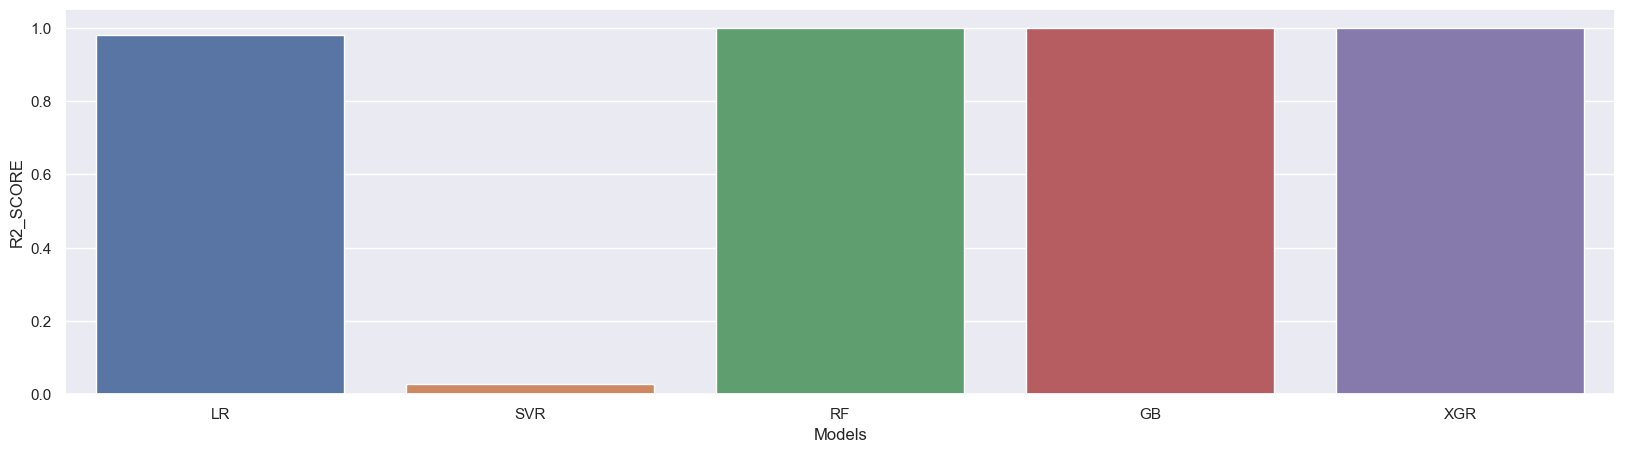

In [317]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])
sns.set(rc={'figure.figsize':(20,4)})
for bars in ax.containers:
    ax.bar_label(bars)

In [318]:
rf.feature_importances_

array([1.92997277e-06, 2.36478359e-06, 2.12983690e-03, 2.15176668e-02,
       1.18577390e-05, 1.16319083e-06, 9.41644798e-01, 3.29216592e-02,
       1.29535075e-04, 1.50241456e-03, 1.36773892e-04])

In [319]:
fea = pd.Series(rf.feature_importances_,index=X_train.columns)

<AxesSubplot:>

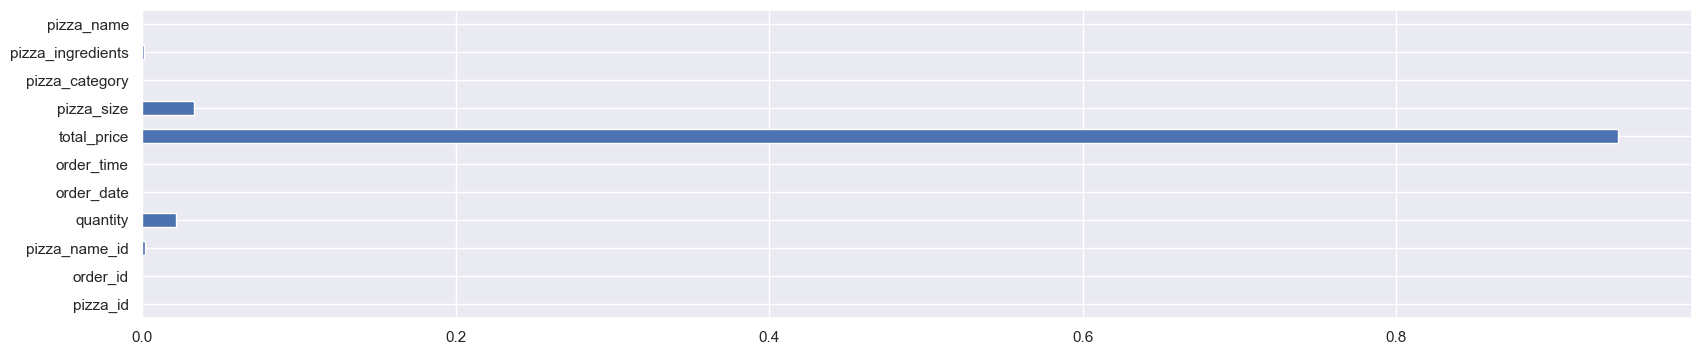

In [320]:
fea.plot(kind='barh')

In [321]:
gbr.feature_importances_

array([4.60929989e-18, 5.71297184e-06, 3.49186368e-04, 2.84915497e-02,
       1.50607356e-06, 6.00702535e-07, 9.39356681e-01, 2.98865820e-02,
       8.10537040e-05, 1.76259552e-03, 6.45321754e-05])

In [322]:
fea = pd.Series(xg.feature_importances_,index=X_train.columns)

<AxesSubplot:>

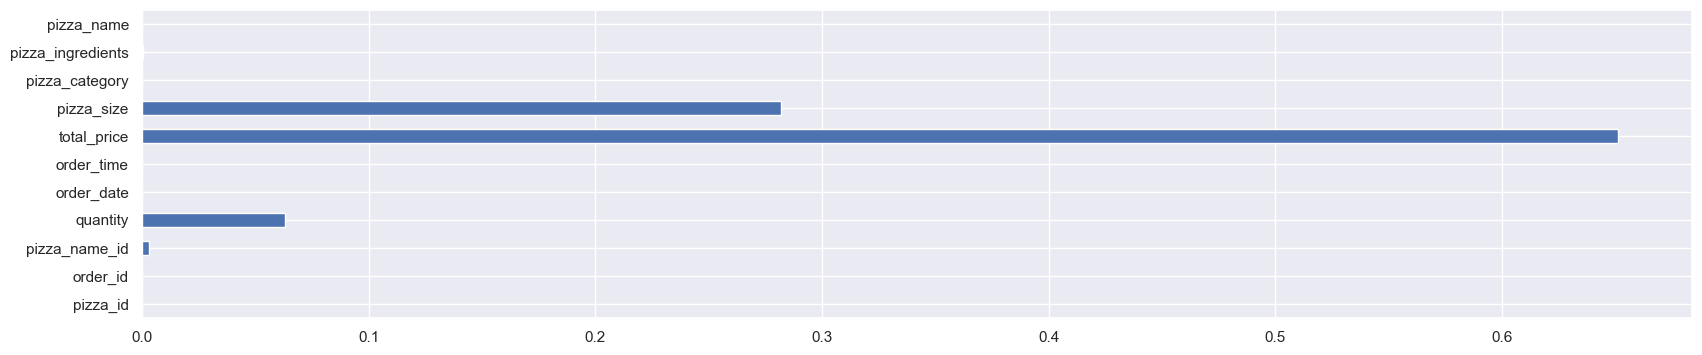

In [323]:
fea.plot(kind='barh')

In [324]:
X = pizza.drop('unit_price',axis=1)
y = pizza['unit_price']

In [325]:
xgb=XGBRegressor()


In [326]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [327]:
import joblib

In [328]:
joblib.dump(xgb,'pizza_price_predict')

['pizza_price_predict']

In [329]:
model = joblib.load('pizza_price_predict')

In [334]:
import pandas as pd
df = pd.DataFrame({'pizza_id':1, 'order_id':1, 'pizza_name_id':5, 'quantity':1, 'order_date':1,
       'order_time':1, 'total_price':1, 'pizza_size':1,
       'pizza_category':2, 'pizza_ingredients':10, 'pizza_name':5},index=[0])

In [335]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,5,1,1,1,1,1,2,10,5


In [336]:
model.predict(df)

array([860.0665], dtype=float32)